<a href="https://colab.research.google.com/github/kesireddysiva/Sivanarayana_INFO_5737_Spring_2024/blob/main/Sivanarayana_Reddy_kesireddy5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

The /content/movie_reviews (1) file is a dataset I have created for the assignment-2.

In [44]:
import pandas as pd

# Function to get N-grams
def get_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams

# Function to count N-grams frequency
def count_ngrams(tokens, n):
    ngram_counts = {}
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1
    return ngram_counts

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(tokens):
    bigram_counts = count_ngrams(tokens, 2)
    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        w2, w1 = bigram
        w1_count = sum(1 for b in bigram_counts.keys() if b[0] == w1)
        if w1_count != 0:
            bigram_probs[bigram] = count / w1_count
        else:
            bigram_probs[bigram] = 0
    return bigram_probs

# Read the dataset
df = pd.read_csv('/content/movie_reviews (1).csv')

# Convert reviews to lowercase and tokenize
tokens = []
for review in df['Review']:
    tokens.extend(review.lower().split())

# (1) Count the frequency of all the 3-grams
trigram_counts = count_ngrams(tokens, 3)
print("Trigram Frequencies:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

# (2) Calculate the probabilities for all the bigrams
bigram_probs = calculate_bigram_probabilities(tokens)
print("\nBigram Probabilities:")
for bigram, prob in bigram_probs.items():
    print(f"{bigram}: {prob:.2f}")


Streaming output truncated to the last 5000 lines.
('a', '3-hour'): 50.00
('3-hour', 'runtime,'): 50.00
('runtime,', 'i'): 1.19
('was', 'engrossed.'): 50.00
('engrossed.', 'it'): 0.91
('was', 'a'): 0.87
('a', 'great'): 15.00
('great', 'story'): 5.56
('story', 'with'): 2.63
('with', 'thorough'): 50.00
('thorough', 'character'): 12.50
('character', 'development.'): 50.00
('development.', 'a'): 0.43
('a', 'young'): 33.33
('young', 'native'): 25.00
('native', 'girl'): 12.50
('girl', 'is'): 1.43
('is', 'effectively'): 50.00
('effectively', 'purchased'): 50.00
('purchased', 'by'): 2.27
('by', 'the'): 0.68
('the', 'mean'): 50.00
('mean', 'british'): 3.57
('british', 'government'): 50.00
('government', 'who'): 3.57
('who', 'is'): 2.14
('is', 'controlling'): 50.00
('controlling', 'the'): 0.23
('the', 'people'): 12.50
('people', 'of'): 0.76
('of', 'malli,'): 16.67
('malli,', 'presumably'): 50.00
('presumably', 'in'): 1.19
('in', 'india.'): 37.50
('india.', 'this'): 1.43
('this', 'small'): 12.50


In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
import pandas as pd
import nltk
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('brown')

# Assuming 'whole_dataset' is the concatenation of all lemmatized reviews
whole_dataset = " ".join(df['Review'])

noun_phrases = []
frequency = []

# Iterate through each line in the 'After Lemmatization' column
for line in df['Review']:
    blob = TextBlob(line)
    # Extract noun phrases from the line and append to the noun_phrases list
    for nouns in blob.noun_phrases:
        noun_phrases.append(nouns)

# Calculate frequency of each noun phrase in each line relative to whole dataset
for word in noun_phrases:
    noun_phrases_freq = []
    count_word = whole_dataset.count(word)
    if count_word == 0:  # Handle division by zero error
        continue
    for line in df['Review']:
        noun_phrases_freq.append(line.count(word) / count_word)
    frequency.append(noun_phrases_freq)

# Create a dictionary to hold noun phrase frequencies
noun_phrases_freq_dict = {phrase: freq for phrase, freq in zip(noun_phrases, frequency)}

# Create DataFrame to represent noun phrase frequencies
noun_phrases_df = pd.DataFrame(noun_phrases_freq_dict)
print(noun_phrases_df)



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


      different styles  different genres  mainstream movie  ca n't   rrr  \
0                  0.0              0.00          0.004167    0.00  0.00   
1                  0.0              0.00          0.000833    0.00  0.00   
2                  0.0              0.00          0.001667    0.00  0.00   
3                  0.0              0.00          0.000000    0.00  0.00   
4                  0.0              0.01          0.000000    0.00  0.00   
...                ...               ...               ...     ...   ...   
1245               0.0              0.00          0.002500    0.00  0.02   
1246               0.0              0.00          0.001667    0.02  0.00   
1247               0.0              0.00          0.000833    0.00  0.00   
1248               0.0              0.00          0.000000    0.00  0.00   
1249               0.0              0.00          0.000833    0.00  0.00   

      minute mark  3+-hour behemoth  slicked-up men  public floggings  \
0             

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [35]:
import math
import pandas as pd
from collections import defaultdict

# Read the dataset using pandas
dataset = pd.read_csv('/content/movie_reviews (1).csv')

# Extract reviews from the dataset
reviews = dataset['Review'].tolist()

# Preprocess documents
def preprocess_document(document):
    processed_document = ''.join(c.lower() for c in document if c.isalnum() or c == ' ')
    return processed_document

processed_documents = [preprocess_document(doc) for doc in reviews]

# Build vocabulary
vocab = set()
for document in processed_documents:
    vocab.update(document.split())

# Build term frequency (TF) matrix
tf_matrix = []
for document in processed_documents:
    tf = defaultdict(int)
    for term in document.split():
        tf[term] += 1
    tf_matrix.append(tf)

# Build inverse document frequency (IDF) vector
def calculate_idf(vocab, documents):
    idf = {}
    N = len(documents)
    for term in vocab:
        count = sum(1 for document in documents if term in document)
        idf[term] = math.log(N / count)
    return idf

idf = calculate_idf(vocab, processed_documents)

# Build TF-IDF matrix
def calculate_tfidf(tf_matrix, idf):
    tfidf_matrix = []
    for tf in tf_matrix:
        tfidf = defaultdict(float)
        for term, freq in tf.items():
            tfidf[term] = freq * idf[term]
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

tfidf_matrix = calculate_tfidf(tf_matrix, idf)

# Define query and preprocess it
query = "An Outstanding movie with a haunting performance and best character development"
processed_query = preprocess_document(query)

# Build query vector
def build_query_vector(query, idf):
    query_vector = defaultdict(float)
    for term in query.split():
        if term in idf:
            query_vector[term] = 1.0 * idf[term]
    return query_vector

query_vector = build_query_vector(processed_query, idf)

# Compute cosine similarity between query vector and document vectors
def calculate_cosine_similarity(tfidf_matrix, query_vector):
    similarities = []
    for tfidf in tfidf_matrix:
        dot_product = sum(tfidf[term] * query_vector[term] for term in query_vector)
        norm_query = math.sqrt(sum(value ** 2 for value in query_vector.values()))
        norm_document = math.sqrt(sum(value ** 2 for value in tfidf.values()))

        # Check if the product of norms is zero to avoid division by zero
        if norm_query * norm_document != 0:
            cosine_similarity = dot_product / (norm_query * norm_document)
            similarities.append(cosine_similarity)
        else:
            # Handle the case where the product of norms is zero
            # Assigning a default value of 0.0
            similarities.append(0.0)
    return similarities

similarities = calculate_cosine_similarity(tfidf_matrix, query_vector)

# Rank documents based on cosine similarity
ranked_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)
ranked_reviews = [reviews[i] for i in ranked_indices]

# Print the ranked reviews with their similarities
# Create a DataFrame from similarities and ranked reviews
df = pd.DataFrame({'Similarity': sorted(similarities, reverse=True), 'Review': ranked_reviews})

# Drop duplicate records
df_unique = df.drop_duplicates()

# Print the DataFrame with unique records only
print(df_unique)



      Similarity                                             Review
0       0.090525  I bet you'd never think the mash-up the heavy-...
50      0.061347  If Magadheera, Eega and the Baahubali movies w...
100     0.043184  This was an incredible film. I never heard of ...
150     0.023496  I'm not a native Telugu speaking audience so t...
200     0.021974  This movie is one of the greatest movies I've ...
250     0.019284  I have to try and review this without comparin...
300     0.018340  RRR (2022) :\nMovie Review -High and Low. No, ...
350     0.018220  We watched the Oscar show last week and witnes...
400     0.017485  The last time director SS Rajamouli managed to...
450     0.016318  Total militaristic propaganda on a scale that ...
500     0.016095  RRR's strengths are easily worth suspending a ...
550     0.005361  There is no doubt that I am out of touch with ...
600     0.005055  RATED 10/10\nLanguage: Telugu\nMedia Partner: ...
650     0.004863  This might be uncultured, but 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

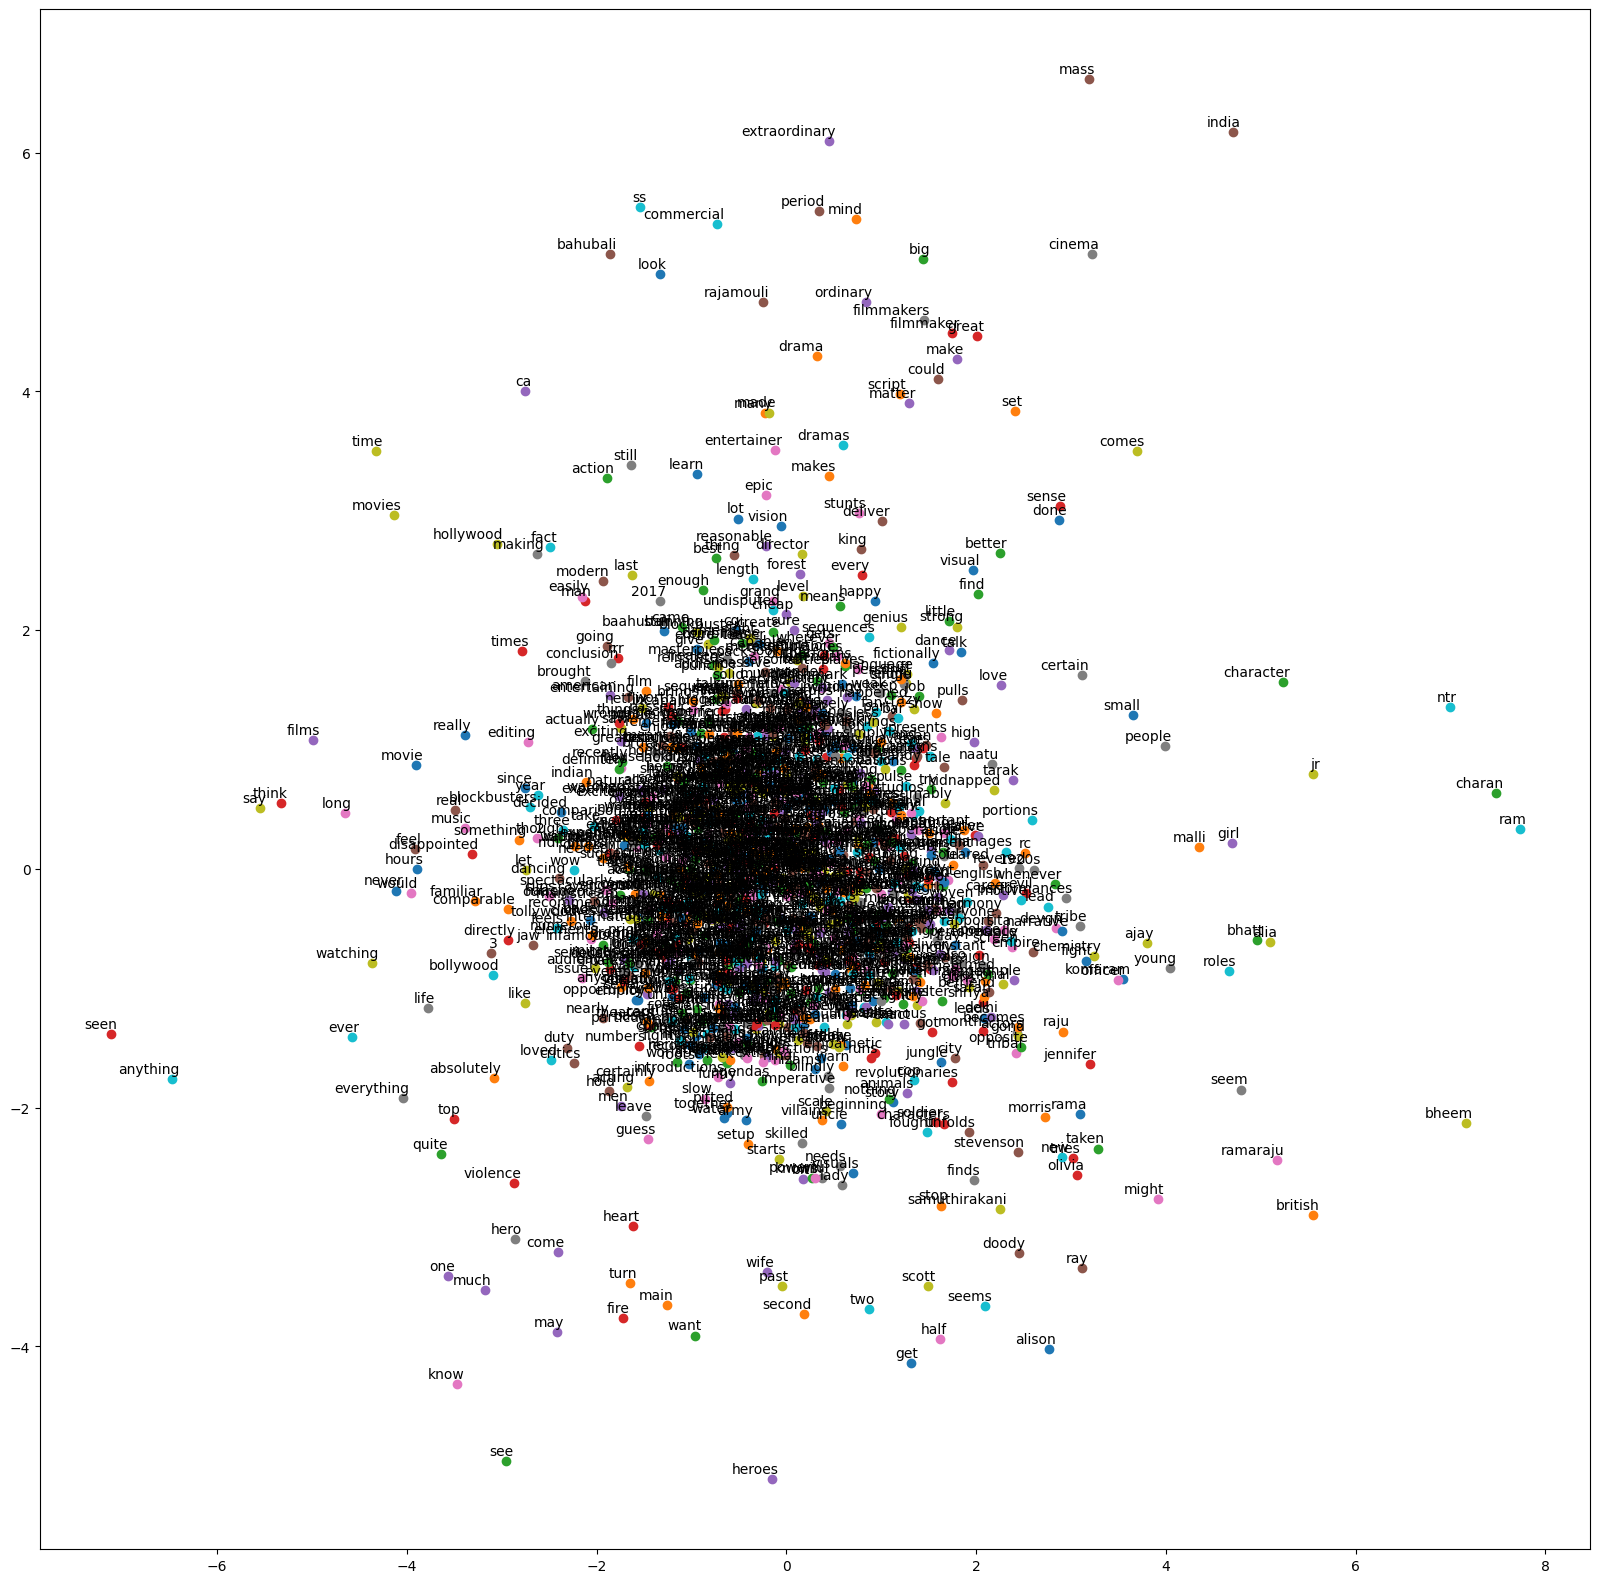

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a CSV file containing your movie reviews data
# Load the data
df = pd.read_csv('/content/movie_reviews (1).csv')

# Preprocessing the text (you may need to adjust this based on your data)
# Here's a simple example of preprocessing, you may need to do more depending on your data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and lowercase the tokens
    tokens = [word.lower() for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to each review
df['tokens'] = df['Review'].apply(preprocess_text)

# Train a Word2Vec model
model = Word2Vec(df['tokens'], vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embedding using PCA
# Get the vectors and corresponding words
vectors = [model.wv[word] for word in model.wv.index_to_key]
words = model.wv.index_to_key

# Fit a 2D PCA model
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot the word embeddings
plt.figure(figsize=(20, 20))
for word, (x, y) in zip(words, result):
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/kesireddysiva/Sivanarayana_INFO_5737_Spring_2024/blob/main/sivanarayana_reddy_review_assignement-3.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The challenge lied in efficiently handling text data manipulation and ensuring the correctness of the implemented algorithms. I particularly enjoyed the process of breaking down the tasks into smaller functions and building them from scratch, as it provided a deeper understanding of the underlying concepts.